In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

from src.data.data_loader import load_data

data_path = "../dataset/spam.csv"
df = load_data(data_path)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## General Info

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   str  
 1   v2          5572 non-null   str  
 2   Unnamed: 2  50 non-null     str  
 3   Unnamed: 3  12 non-null     str  
 4   Unnamed: 4  6 non-null      str  
dtypes: str(5)
memory usage: 217.8 KB


## Missing Values

Will delete the third to fifth columns due to the csv format

In [6]:
df = df[['v1', 'v2']]

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

## Duplicate Data

In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
df.drop_duplicates()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Label Standardization

In [12]:
df = df.map(str.lower)

In [13]:
df.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Analysis Target

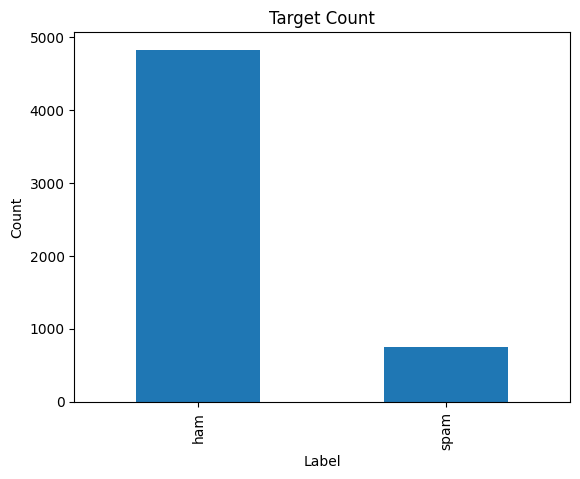

In [19]:
df['v1'].value_counts().plot(kind='bar')

plt.title('Target Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [23]:
pct_count = (df['v1'].value_counts()/len(df))*100
print(pct_count)

v1
ham     86.593683
spam    13.406317
Name: count, dtype: float64


From the graph and percentages above, it can be seen that this dataset is imbalanced with 86% ham

## Text Behaviour Analysis

### Character Length

In [25]:
df['char_count'] = df['v2'].apply(len)

In [26]:
df.groupby('v1')['char_count'].mean()

v1
ham      71.023627
spam    138.866131
Name: char_count, dtype: float64

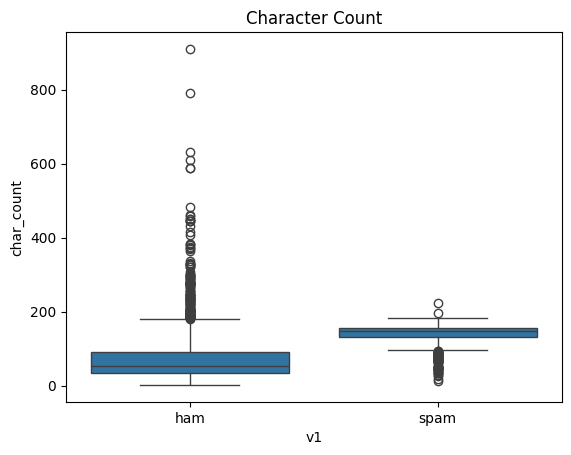

In [27]:
import seaborn as sns

sns.boxplot(x='v1', y='char_count', data=df)
plt.title('Character Count')
plt.show()